In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib
import os
from scipy.stats import chi2

# 3D llr plots

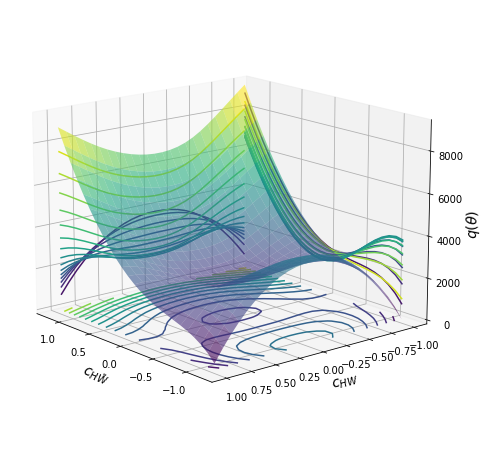

In [2]:
config = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSM_2D',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'kinematic_only',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_5000000_samples_2D',
        'model': 'alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-1.2, 1.2], [-1.0, 1.0]],
        'grid_resolutions': [25,25]
    }
}

load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
data = np.load(f"{load_dir}/ensemble_data_2D.npz")
parameter_grid = data['parameter_grid']
llr_kin = data['llr_kin']
llr_rate = data['llr_rate']
index_best_point = data['index_best_point']

rescaled_log_r = llr_kin+llr_rate
rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    

theta0 = parameter_grid[:, 0]
theta1 = parameter_grid[:, 1]

theta_0 = []
llr_0 = []

theta_1 = []
llr_1 = []

title  = "ALICES"
thetas_0 = np.where(parameter_grid[:, 1]==0)[0]

# Find unique values of theta0 and theta1
for i in thetas_0:
    theta_0.append(theta0[int(i)])
    llr_0.append(rescaled_log_r[int(i)])

thetas_1 = np.where(parameter_grid[:, 0]==0)[0]

# Find unique values of theta0 and theta1
for i in thetas_1:
    theta_1.append(theta1[int(i)])
    llr_1.append(rescaled_log_r[int(i)])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
rescaled_log_r = rescaled_log_r.reshape(25,25)
Theta0, Theta1 = np.meshgrid(theta_0, theta_1)
contour_levels = 15
from scipy.stats import chi2

def chi2_thresholds(cl):
    return chi2.ppf(cl, df=2)  # 1 degree of freedom for 1D parameter space

level_95 = chi2_thresholds(0.95)
level_68 = chi2_thresholds(0.68)




ax.plot_surface(Theta0, Theta1, rescaled_log_r, cmap='viridis', alpha=0.6)

ax.contour(Theta0, Theta1, rescaled_log_r, zdir='z', offset=np.min(rescaled_log_r), cmap='viridis',levels=contour_levels)

# Y-Z projection
ax.contour(Theta0, Theta1, rescaled_log_r, zdir='x', offset=np.max(Theta0), cmap='viridis',levels=contour_levels)

# X-Z projection
ax.contour(Theta0, Theta1, rescaled_log_r, zdir='y', offset=np.min(Theta1), cmap='viridis',levels=contour_levels)
# # Adding planes at 95% and 68% CL

# ax.plot_surface(Theta0, Theta1, level_95 * np.ones_like(Theta0), color='red', alpha=0.3, label='95% CL')
# ax.plot_surface(Theta0, Theta1, level_68 * np.ones_like(Theta0), color='blue', alpha=0.3, label='68% CL')


ax.view_init( elev=15 , azim=140)  # elevation 30 degrees, azimuth 120 degrees
ax.set_xlabel(r'$c_{H\tildeW}$', size=14)
ax.set_ylabel(r'$c_{HW}$', size=14)
ax.set_zlabel(r'$q (\theta)$', size=14)
#ax.set_title(title)
#ax.set_zlim(0, 300)

# os.makedirs(f"{config['plot_dir']}/3d_plots/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/",exist_ok=True)
# save_dir = f"{config['plot_dir']}/3d_plots/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/"
# fig_name = f"2D_3d_llr_plot_{config['sample_name']}_range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}"

# output_path = os.path.join(save_dir, f"{fig_name}.pdf")
plt.savefig("/lstore/titan/martafsilva/master_thesis/thesis_plots/3d_plot_signal_only_full_range.pdf", dpi=600,bbox_inches='tight' )
plt.show()

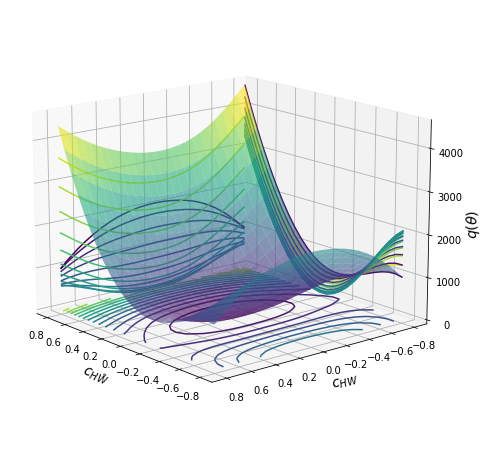

In [3]:
config = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSM_2D',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'kinematic_only',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_5000000_samples_2D',
        'model': 'alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
        'grid_resolutions': [25,25]
    }
}

load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
data = np.load(f"{load_dir}/ensemble_data_2D.npz")
parameter_grid = data['parameter_grid']
llr_kin = data['llr_kin']
llr_rate = data['llr_rate']
index_best_point = data['index_best_point']

rescaled_log_r = llr_kin+llr_rate
rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    

theta0 = parameter_grid[:, 0]
theta1 = parameter_grid[:, 1]

theta_0 = []
llr_0 = []

theta_1 = []
llr_1 = []

title  = "ALICES"
thetas_0 = np.where(parameter_grid[:, 1]==0)[0]

# Find unique values of theta0 and theta1
for i in thetas_0:
    theta_0.append(theta0[int(i)])
    llr_0.append(rescaled_log_r[int(i)])

thetas_1 = np.where(parameter_grid[:, 0]==0)[0]

# Find unique values of theta0 and theta1
for i in thetas_1:
    theta_1.append(theta1[int(i)])
    llr_1.append(rescaled_log_r[int(i)])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
rescaled_log_r = rescaled_log_r.reshape(25,25)
Theta0, Theta1 = np.meshgrid(theta_0, theta_1)
contour_levels = 15
from scipy.stats import chi2

def chi2_thresholds(cl):
    return chi2.ppf(cl, df=2)  # 1 degree of freedom for 1D parameter space

level_95 = chi2_thresholds(0.95)
level_68 = chi2_thresholds(0.68)




ax.plot_surface(Theta0, Theta1, rescaled_log_r, cmap='viridis', alpha=0.6)

ax.contour(Theta0, Theta1, rescaled_log_r, zdir='z', offset=np.min(rescaled_log_r), cmap='viridis',levels=contour_levels)

# Y-Z projection
ax.contour(Theta0, Theta1, rescaled_log_r, zdir='x', offset=np.max(Theta0), cmap='viridis',levels=contour_levels)

# X-Z projection
ax.contour(Theta0, Theta1, rescaled_log_r, zdir='y', offset=np.min(Theta1), cmap='viridis',levels=contour_levels)
# # Adding planes at 95% and 68% CL

# ax.plot_surface(Theta0, Theta1, level_95 * np.ones_like(Theta0), color='red', alpha=0.3, label='95% CL')
# ax.plot_surface(Theta0, Theta1, level_68 * np.ones_like(Theta0), color='blue', alpha=0.3, label='68% CL')


ax.view_init( elev=15 , azim=140)  # elevation 30 degrees, azimuth 120 degrees
ax.set_xlabel(r'$c_{H\tildeW}$', size=14)
ax.set_ylabel(r'$c_{HW}$', size=14)
ax.set_zlabel(r'$q (\theta)$', size=14)
#ax.set_title(title)
#ax.set_zlim(0, 300)

# os.makedirs(f"{config['plot_dir']}/3d_plots/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/",exist_ok=True)
# save_dir = f"{config['plot_dir']}/3d_plots/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/"
# fig_name = f"2D_3d_llr_plot_{config['sample_name']}_range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}"

# output_path = os.path.join(save_dir, f"{fig_name}.pdf")
# plt.savefig(output_path)
plt.savefig("/lstore/titan/martafsilva/master_thesis/thesis_plots/3d_plot_signal_only_reduced_range.pdf", dpi=600,bbox_inches='tight' )

plt.show()

# 2D contour plots

Minimum value of the interpolated likelihood ratios: -1.7560315926837171
Corresponding x value (min_x): 0.01059602649006619
Corresponding y value (min_y): -0.015894039735099397
1225
Minimum value of the interpolated likelihood ratios: -0.0009558101605661729
Corresponding x value (min_x): -0.005298013245033206
Corresponding y value (min_y): 0.0
[-3802.82500931 -3804.69296549 -3806.19417922 ... -3756.04399771
 -3755.57426196 -3755.23346151]
Minimum value of the interpolated likelihood ratios: -0.0012901445147009416
Corresponding x value (min_x): -0.007947019867549532
Corresponding y value (min_y): 0.0
[-37571.48576349 -37489.04701857 -37412.83438833 ... -36889.55340699
 -36893.79611579 -36898.31992996]
Minimum value of the interpolated likelihood ratios: -0.00022879253644689777
Corresponding x value (min_x): 0.07947019867549665
Corresponding y value (min_y): 0.0
[-34854.1567     -34769.1754266  -34691.09088297 ... -34116.79270042
 -34120.06762986 -34123.75015153]
Minimum value of the int

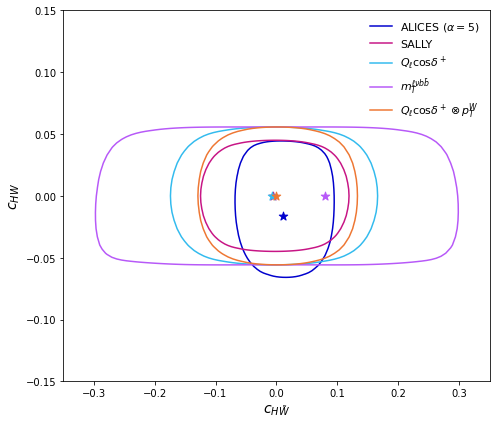

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

def plot_2D_contours_ensemble(config):
    
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
    
    data = np.load(f"{load_dir}/ensemble_data_2D.npz")
    parameter_grid = data['parameter_grid']
    index_best_point = data['index_best_point']
    p_values = data['p_values']
    llr_kin = data['llr_kin']
    llr_rate = data['llr_rate']

    rescaled_log_r = llr_kin+llr_rate

    rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point]) 
    grid_ranges = config['limits']['grid_ranges']
    grid_resolutions = config['limits']['grid_resolutions']

    bin_size = (grid_ranges[0][1] - grid_ranges[0][0]) / (grid_resolutions[0] - 1)
    edges = np.linspace(grid_ranges[0][0] - bin_size / 2, grid_ranges[0][1] + bin_size / 2, grid_resolutions[0] + 1)
    centers_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])
    centers_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], grid_resolutions[1])


    ax = plt.gca()

    contour_levels = [0.05]
    linestyles = ['-']

    

    # Check for the method type to set title and color
    if config['limits']['method'] == 'sally':
        title = 'SALLY'
        color = 'mediumvioletred'
    elif config['limits']['method'] == 'alices':
        title = r'ALICES $(\alpha = 5$)'
        color ='mediumblue'
    elif config['limits']['method'] == 'alice':
        title = 'ALICE'
        color =  'darkgreen'

    # Create spline interpolation function
    spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))
    spline_interpolator_2 = RectBivariateSpline(
            centers_x, centers_y, rescaled_log_r.reshape((grid_resolutions[0], grid_resolutions[1]))
        )
    # Generate a finer grid for interpolation
    fine_grid_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], 303)
    fine_grid_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], 303)
    fine_grid_xx, fine_grid_yy = np.meshgrid(fine_grid_x, fine_grid_y)

    # Evaluate interpolated values on the finer grid
    interpolated_p_values = spline_interpolator(fine_grid_x, fine_grid_y)
    # Evaluate interpolated values on the finer grid
    interpolated_likelihood_ratios = spline_interpolator_2(fine_grid_x, fine_grid_y)
    # Find the minimum of the interpolated likelihood ratios
    min_value = np.min(interpolated_likelihood_ratios)

    # Get the index of the minimum
    min_index = np.argmin(interpolated_likelihood_ratios)

    # Get the corresponding x and y values at the minimum
    min_x = fine_grid_x[min_index // fine_grid_y.size]  # Corresponding x-coordinate
    min_y = fine_grid_y[min_index % fine_grid_y.size]  # Corresponding y-coordinate

    print(f"Minimum value of the interpolated likelihood ratios: {min_value}")
    print(f"Corresponding x value (min_x): {min_x}")
    print(f"Corresponding y value (min_y): {min_y}")
   
    # Plot the interpolated contours
    for j, level in enumerate(contour_levels):
        contour = ax.contour(
            fine_grid_x, fine_grid_y, interpolated_p_values.T,
            levels=[level],
            linestyles=linestyles[j % len(linestyles)],
            colors=color
        )
    # for j, level in enumerate(contour_levels):
    #     contour = ax.contour(
    #         centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])).T,
    #         levels=[level],
    #         linestyles=linestyles[j % len(linestyles)],
    #         colors=color 
    #     )
        
    # Mark the best point
    # plt.scatter(
    #     parameter_grid[index_best_point][0], parameter_grid[index_best_point][1],
    #     s=80., marker='*', color=color
    # )
    plt.scatter(
        min_x, min_y,
        s=80., marker='*', color=color
    )   
    # Add a legend
    plt.plot(-50, -50, label=title, color=color, linestyle='-')
    
    plt.xlabel(r'$c_{H\tildeW}$')
    plt.ylabel(r'$c_{HW}$')
    #plt.tight_layout()
    plt.legend()
    #plt.savefig(f"{save_dir}/{fig_name}")


def plot_2D_contours_histo(config,var):

    load_dir = f"{config['main_dir']}/llr_fits_hist/{var}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
    if var == "mt_tot":
        data= np.load(f"{load_dir}/data_2D_test_split_0.5_Ricardos_binning.npz")
    else:
        data = np.load(f"{load_dir}/data_2D_test_split_0.5.npz")
    llr_kin = data['llr_kin']
    llr_rate = data['llr_rate']

    index_best_point =  data['index_best_point']
    parameter_grid = data['parameter_grid']
    p_values=data['p_values']
    print(llr_kin)
    rescaled_log_r = llr_kin+llr_rate

    rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])  
    grid_ranges = config['limits']['grid_ranges']
    grid_resolutions = config['limits']['grid_resolutions']

    bin_size = (grid_ranges[0][1] - grid_ranges[0][0]) / (grid_resolutions[0] - 1)
    edges = np.linspace(grid_ranges[0][0] - bin_size / 2, grid_ranges[0][1] + bin_size / 2, grid_resolutions[0] + 1)
    centers = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])
    centers_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])
    centers_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], grid_resolutions[1])


    ax = plt.gca()

    contour_levels = [0.05]
    linestyles = ['-']

    if var == "ql_cos_deltaPlus":
        title = r"$Q_{\ell} \cos \delta^+$"
        color = "#33BBEE"
    if var == "mt_tot":
        title = r"$m_T^{\ell \nu b\barb}$"
        color = "#B759F8"

    if var == "ql_cos_deltaPlus_pt_w":
        title = r'$Q_{\ell}  \cos  \delta^+ \otimes p_T^W$'
        color="#EE7733"
    spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))
    spline_interpolator_2 = RectBivariateSpline(
            centers_x, centers_y, rescaled_log_r.reshape((grid_resolutions[0], grid_resolutions[1]))
        )
    # Generate a finer grid for interpolation
    fine_grid_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], 303)
    fine_grid_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], 303)
    fine_grid_xx, fine_grid_yy = np.meshgrid(fine_grid_x, fine_grid_y)

    # Evaluate interpolated values on the finer grid
    interpolated_p_values = spline_interpolator(fine_grid_x, fine_grid_y)
    
    # Evaluate interpolated values on the finer grid
    interpolated_likelihood_ratios = spline_interpolator_2(fine_grid_x, fine_grid_y)
    # Find the minimum of the interpolated likelihood ratios
    min_value = np.min(interpolated_likelihood_ratios)

    # Get the index of the minimum
    min_index = np.argmin(interpolated_likelihood_ratios)

    # Get the corresponding x and y values at the minimum
    min_x = fine_grid_x[min_index // fine_grid_y.size]  # Corresponding x-coordinate
    min_y = fine_grid_y[min_index % fine_grid_y.size]  # Corresponding y-coordinate

    print(f"Minimum value of the interpolated likelihood ratios: {min_value}")
    print(f"Corresponding x value (min_x): {min_x}")
    print(f"Corresponding y value (min_y): {min_y}")
    
    # Plot the interpolated contours
    for j, level in enumerate(contour_levels):
        contour = ax.contour(
            fine_grid_x, fine_grid_y, interpolated_p_values.T,
            levels=[level],
            linestyles=linestyles[j % len(linestyles)],
            colors=color
        )
    
  
    # for j, level in enumerate(contour_levels):
    #     contour = ax.contour(
    #         centers, centers, p_values.reshape((grid_resolutions[0], grid_resolutions[1])).T,
    #         levels=[level],
    #         linestyles=linestyles[j % len(linestyles)],
    #         colors = 'b'
    #     )
        
    # plt.scatter(
    #     parameter_grid[index_best_point][0], parameter_grid[index_best_point][1],
    #     s=80., marker='*', color = color
    # )
    plt.scatter(
        min_x, min_y,
        s=80., marker='*', color=color
    )   
    plt.plot(-50,-50, label=title, linestyle = '-',color = color)

    
    plt.xlabel(r'$c_{H\tildeW}$')
    plt.ylabel(r'$c_{HW}$')
   
    plt.legend()
    #plt.savefig(f"{save_dir}/{fig_name}")

def plot_2D_contours_ensemble_sally(config):
    
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
    
    data = np.load(f"{load_dir}/ensemble_data_2D_test_split_0.5.npz")

    llr_kin = data['llr_kin']
    llr_rate = data['llr_rate']
    index_best_point =  data['index_best_point']
    parameter_grid = data['parameter_grid']
    p_values = data['p_values']
    rescaled_log_r = llr_kin+llr_rate

    rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    

    # p_values = chi2.sf(x=rescaled_log_r, df=1)
    print(len(p_values))
    grid_ranges = config['limits']['grid_ranges']
    grid_resolutions = config['limits']['grid_resolutions']
    

    bin_size = (grid_ranges[0][1] - grid_ranges[0][0]) / (grid_resolutions[0] - 1)
    edges = np.linspace(grid_ranges[0][0] - bin_size / 2, grid_ranges[0][1] + bin_size / 2, grid_resolutions[0] + 1)
    centers_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])
    centers_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], grid_resolutions[1])

    ax = plt.gca()

    contour_levels = [0.05]
    linestyles = ['-']

    # Check for the method type to set title and color
    if config['limits']['method'] == 'sally':
        title = 'SALLY'
        color = 'mediumvioletred'
    elif config['limits']['method'] == 'alices':
        title = r'ALICES $(\alpha = 10$)'
        color = '0000C5'
    elif config['limits']['method'] == 'alice':
        title = 'ALICE'
        color = '#296218'
    # Create spline interpolation function
    spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))
    spline_interpolator_2 = RectBivariateSpline(
            centers_x, centers_y, rescaled_log_r.reshape((grid_resolutions[0], grid_resolutions[1]))
        )

    # Generate a finer grid for interpolation
    fine_grid_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], 303)
    fine_grid_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], 303)
    fine_grid_xx, fine_grid_yy = np.meshgrid(fine_grid_x, fine_grid_y)

    # Evaluate interpolated values on the finer grid
    interpolated_p_values = spline_interpolator(fine_grid_x, fine_grid_y)
    
    # Evaluate interpolated values on the finer grid
    interpolated_likelihood_ratios = spline_interpolator_2(fine_grid_x, fine_grid_y)
    # Find the minimum of the interpolated likelihood ratios
    min_value = np.min(interpolated_likelihood_ratios)

    # Get the index of the minimum
    min_index = np.argmin(interpolated_likelihood_ratios)

    # Get the corresponding x and y values at the minimum
    min_coords = np.unravel_index(min_index, interpolated_likelihood_ratios.shape)

    # Get the corresponding x and y values at the minimum
    min_x = fine_grid_x[min_coords[0]]  # Corresponding x-coordinate
    min_y = fine_grid_y[min_coords[1]]  # Corresponding y-coordinate

    print(f"Minimum value of the interpolated likelihood ratios: {min_value}")
    print(f"Corresponding x value (min_x): {min_x}")
    print(f"Corresponding y value (min_y): {min_y}")
    
    # Plot the interpolated contours
    for j, level in enumerate(contour_levels):
        contour = ax.contour(
            fine_grid_x, fine_grid_y, interpolated_p_values.T,
            levels=[level],
            linestyles=linestyles[j % len(linestyles)],
            colors=color
        )
    # for j, level in enumerate(contour_levels):
    #     contour = ax.contour(
    #         centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])).T,
    #         levels=[level],
    #         linestyles=linestyles[j % len(linestyles)],
    #         colors=color 
    #     )
        
    # # Mark the best point
    # plt.scatter(
    #     parameter_grid[index_best_point][0], parameter_grid[index_best_point][1],
    #     s=80., marker='*', color=color
    # )

    plt.scatter(
        min_x, min_y,
        s=80., marker='*', color=color
    )
    
    # Add a legend
    plt.plot(-50, -50, label=title, color=color, linestyle='-')
    
    plt.xlabel(r'$c_{H\tildeW}$')
    plt.ylabel(r'$c_{HW}$')
    #plt.tight_layout()
    plt.legend()
    #plt.savefig(f"{save_dir}/{fig_name}")
    
# Configuration dictionaries
config_alices =  {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        'sample_name': 'wh_signalWithBSM_2D_half',

        'limits': {
            'mode': 'ml',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
            'model': 'alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128',
            'method': 'alices',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

config_sally =     {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSM_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

# Create the directory structure and file names

# Create the combined plot
fig, ax = plt.subplots(figsize=(7, 6))


plot_2D_contours_ensemble(config_alices)

plot_2D_contours_ensemble_sally(config_sally)

configa = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSM_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'kinematic_only',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_10e7_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-1.2, 1.2], [-1.0, 1.0]],
        'grid_resolutions': [35,35]
    }
}

plot_2D_contours_histo(configa,"ql_cos_deltaPlus")

plot_2D_contours_histo(configa,"mt_tot")

plot_2D_contours_histo(configa,"ql_cos_deltaPlus_pt_w")

ax.set_xlim(-0.35, 0.35)
ax.set_ylim(-0.15, 0.15)
ax.set_xlabel(r'$c_{H\tildeW}$', size = 14)
ax.set_ylabel(r'$c_{HW}$', size = 14)
ax.legend(fontsize=11, frameon = False)

plt.tight_layout()
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_ensemble_plots_signal_only.pdf', dpi=600,bbox_inches='tight')
plt.show()

Minimum value of the interpolated likelihood ratios: -0.1996547464294481
Corresponding x value (min_x): -0.08476821192052986
Corresponding y value (min_y): -0.03178807947019868
1225
Minimum value of the interpolated likelihood ratios: -0.43215521638288373
Corresponding x value (min_x): 0.03178807947019868
Corresponding y value (min_y): 0.02119205298013238
[-27466.92208106 -27467.01630543 -27467.15123224 ... -27491.08314647
 -27492.52711564 -27494.01443101]
Minimum value of the interpolated likelihood ratios: -0.039817983533661255
Corresponding x value (min_x): -0.007947019867549532
Corresponding y value (min_y): 0.0066225165562914245
[-263685.01934432 -263665.77843583 -263648.66114375 ... -263880.53365885
 -263915.38650334 -263952.27469265]
Minimum value of the interpolated likelihood ratios: -0.01511192860604546
Corresponding x value (min_x): -0.15099337748344377
Corresponding y value (min_y): -0.0066225165562914245
[-243920.61824098 -243900.17466337 -243882.2129229  ... -244196.54692

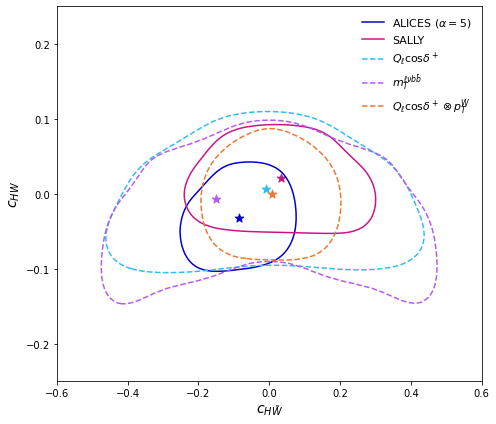

In [36]:
config_alices = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'all_observables_remove_redundant_cos',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_10_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
        'grid_resolutions': [35,35]
    }
}

config_sally = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }
# Create the directory structure and file names

# Create the combined plot
fig, ax = plt.subplots(figsize=(7, 6))


plot_2D_contours_ensemble(config_alices)

plot_2D_contours_ensemble_sally(config_sally)

configa = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'kinematic_only',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_10e7_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_10_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-1.2, 1.2], [-1.0, 1.0]],
        'grid_resolutions': [35,35]
    }
}

plot_2D_contours_histo(configa,"ql_cos_deltaPlus")

plot_2D_contours_histo(configa,"mt_tot")

plot_2D_contours_histo(configa,"ql_cos_deltaPlus_pt_w")

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel(r'$c_{H\tildeW}$', size = 14)
ax.set_ylabel(r'$c_{HW}$', size = 14)
ax.legend(fontsize=11, frameon = False)

plt.tight_layout()
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_ensemble_plots_signal_and_backgrouds.pdf', dpi=600,bbox_inches='tight')

plt.show()

# Individual 2D contour plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

def plot_2D_contours_individual(config):

    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
    
    grid_ranges = config['limits']['grid_ranges']
    grid_resolutions = config['limits']['grid_resolutions']

    # Compute the centers of bins for both dimensions
    centers_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])
    centers_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], grid_resolutions[1])

    contour_levels = [0.05, 0.32]
    linestyles = ['-', '--']

    colors = ['mediumblue', 'darkgreen', 'mediumvioletred', 'indigo','teal']
    
    fig = plt.figure(figsize=(7, 6))
    ax = plt.gca()

    # Load data for 5 estimators
    for i in range(5):
        data = np.load(f"{load_dir}/estimator_{i}_data_2D.npz")
        llr_kin = data['llr_kin']
        llr_rate = data['llr_rate']
        index_best_point =  data['index_best_point']
        parameter_grid = data['parameter_grid']
        p_values = data['p_values']
        rescaled_log_r = llr_kin+llr_rate

        rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    


        # Create spline interpolation for each estimator
        spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))

        # Create spline interpolation function
        spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))
        spline_interpolator_2 = RectBivariateSpline(
                centers_x, centers_y, rescaled_log_r.reshape((grid_resolutions[0], grid_resolutions[1]))
            )

        # Generate a finer grid for interpolation
        fine_grid_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], 303)
        fine_grid_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], 303)
        fine_grid_xx, fine_grid_yy = np.meshgrid(fine_grid_x, fine_grid_y)

        # Evaluate interpolated values on the finer grid
        interpolated_p_values = spline_interpolator(fine_grid_x, fine_grid_y)
        
        # Evaluate interpolated values on the finer grid
        interpolated_likelihood_ratios = spline_interpolator_2(fine_grid_x, fine_grid_y)
        # Find the minimum of the interpolated likelihood ratios
        min_value = np.min(interpolated_likelihood_ratios)

        # Get the index of the minimum
        min_index = np.argmin(interpolated_likelihood_ratios)

        # Get the corresponding x and y values at the minimum
        min_coords = np.unravel_index(min_index, interpolated_likelihood_ratios.shape)
        min_x = fine_grid_x[min_coords[0]]  # Corresponding x-coordinate
        min_y = fine_grid_y[min_coords[1]]  # Corresponding y-coordinate
    
        # Plot interpolated contours for each estimator
        for j, level in enumerate(contour_levels):
            ax.contour(
                fine_grid_x, fine_grid_y, interpolated_p_values.T,
                levels=[level],
                linestyles=linestyles[j % len(linestyles)],
                colors=colors[i]
            )

        # Mark the best point for each estimator
        # plt.scatter(
        #     parameter_grid[index_best_point][0], parameter_grid[index_best_point][1],
        #     s=80., marker='*', color=colors[i]
        # )
        plt.scatter(
            min_x, min_y,
            s=80., marker='*', color=colors[i]
        )
        # Plot legend label for each estimator
        plt.plot(-50, 50, label=f'Estimator {i+1}', color=colors[i], linestyle='-')



    if config['limits']['method'] == 'sally':
        title = 'SALLY'
    elif config['limits']['method'] == 'alices':
        title = r'$\bf{ALICES}$ ($\alpha = 5$)'
    elif config['limits']['method'] == 'alice':
        title = 'ALICE'


    # Set axis labels and other plot attributes
    plt.xlabel(r'$c_{H\tildeW}$',size = 14)
    plt.ylabel(r'$c_{HW}$', size=14)
    plt.tight_layout()
    plt.legend( frameon = False, fontsize=11)
    # plt.savefig(f"{save_dir}/{fig_name}")



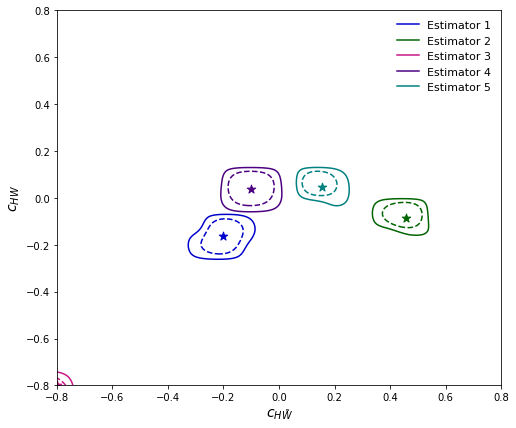

In [ ]:
config_alices = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'all_observables_remove_redundant_cos',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_5_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
        'grid_resolutions': [25,25]
    }
}

plot_2D_contours_individual(config_alices)
plt.xlim(-0.8,0.8)
plt.ylim(-0.8,0.8)
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_individual_plots_signal_and_backgrounds_no_otimization.pdf', dpi=600,bbox_inches='tight')


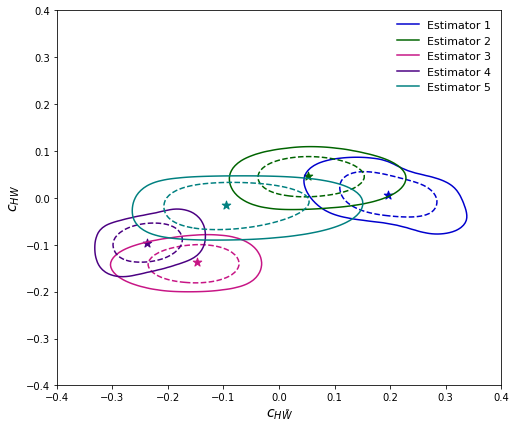

In [27]:
config_alices = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'all_observables_remove_redundant_cos',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_10_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
        'grid_resolutions': [35,35]
    }
}

plot_2D_contours_individual(config_alices)
plt.xlim(-0.4,0.4)
plt.ylim(-0.4,0.4)
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_individual_plots_signal_and_backgrounds_with_otimization.pdf', dpi=600,bbox_inches='tight')


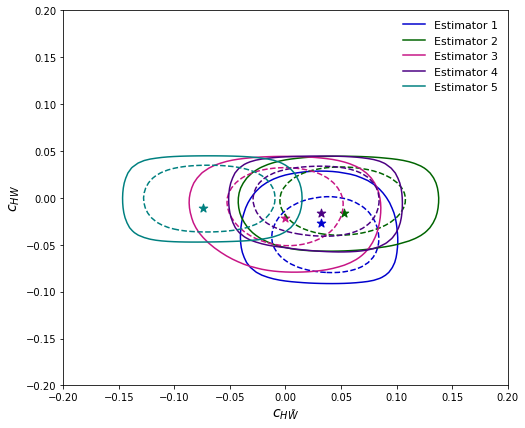

In [28]:
config_alices =  {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        'sample_name': 'wh_signalWithBSM_2D_half',

        'limits': {
            'mode': 'ml',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
            'model': 'alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128',
            'method': 'alices',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }


plot_2D_contours_individual(config_alices)
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_individual_plots_signal_only.pdf', dpi=600,bbox_inches='tight')


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

def plot_2D_contours_individual_sally(config):

    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"
    
    grid_ranges = config['limits']['grid_ranges']
    grid_resolutions = config['limits']['grid_resolutions']

    # Compute the centers of bins for both dimensions
    centers_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])
    centers_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], grid_resolutions[1])

    contour_levels = [0.05, 0.32]
    linestyles = ['-', '--']

    colors = ['mediumblue', 'darkgreen', 'mediumvioletred', 'indigo','teal']
    
    fig = plt.figure(figsize=(7, 6))
    ax = plt.gca()

    # Load data for 5 estimators
    for i in range(5):
        data = np.load(f"{load_dir}/estimator_{i}_data_2D_test_split_0.5.npz")
        llr_kin = data['llr_kin']
        llr_rate = data['llr_rate']
        index_best_point =  data['index_best_point']
        parameter_grid = data['parameter_grid']
        p_values = data['p_values']
        rescaled_log_r = llr_kin+llr_rate

        rescaled_log_r = -2.0*(rescaled_log_r[:] - rescaled_log_r[index_best_point])    


        # Create spline interpolation for each estimator
        spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))

        # Create spline interpolation function
        spline_interpolator = RectBivariateSpline(centers_x, centers_y, p_values.reshape((grid_resolutions[0], grid_resolutions[1])))
        spline_interpolator_2 = RectBivariateSpline(
                centers_x, centers_y, rescaled_log_r.reshape((grid_resolutions[0], grid_resolutions[1]))
            )

        # Generate a finer grid for interpolation
        fine_grid_x = np.linspace(grid_ranges[0][0], grid_ranges[0][1], 303)
        fine_grid_y = np.linspace(grid_ranges[1][0], grid_ranges[1][1], 303)
        fine_grid_xx, fine_grid_yy = np.meshgrid(fine_grid_x, fine_grid_y)

        # Evaluate interpolated values on the finer grid
        interpolated_p_values = spline_interpolator(fine_grid_x, fine_grid_y)
        
        # Evaluate interpolated values on the finer grid
        interpolated_likelihood_ratios = spline_interpolator_2(fine_grid_x, fine_grid_y)
        # Find the minimum of the interpolated likelihood ratios
        min_value = np.min(interpolated_likelihood_ratios)

        # Get the index of the minimum
        min_index = np.argmin(interpolated_likelihood_ratios)

        # Get the corresponding x and y values at the minimum
        min_coords = np.unravel_index(min_index, interpolated_likelihood_ratios.shape)
        min_x = fine_grid_x[min_coords[0]]  # Corresponding x-coordinate
        min_y = fine_grid_y[min_coords[1]]  # Corresponding y-coordinate
    
        # Plot interpolated contours for each estimator
        for j, level in enumerate(contour_levels):
            ax.contour(
                fine_grid_x, fine_grid_y, interpolated_p_values.T,
                levels=[level],
                linestyles=linestyles[j % len(linestyles)],
                colors=colors[i]
            )

        # Mark the best point for each estimator
        # plt.scatter(
        #     parameter_grid[index_best_point][0], parameter_grid[index_best_point][1],
        #     s=80., marker='*', color=colors[i]
        # )
        plt.scatter(
            min_x, min_y,
            s=80., marker='*', color=colors[i]
        )

        # Plot legend label for each estimator
        plt.plot(-50, 50, label=f'Estimator {i+1}', color=colors[i], linestyle='-')



    if config['limits']['method'] == 'sally':
        title = 'SALLY'
    elif config['limits']['method'] == 'alices':
        title = 'ALICES'
    elif config['limits']['method'] == 'alice':
        title = 'ALICE'


    # Set axis labels and other plot attributes
    plt.xlabel(r'$c_{H\tildeW}$',size = 14)
    plt.ylabel(r'$c_{HW}$', size=14)
    plt.tight_layout()
    plt.legend( frameon = False, fontsize=11)
    # plt.savefig(f"{save_dir}/{fig_name}")

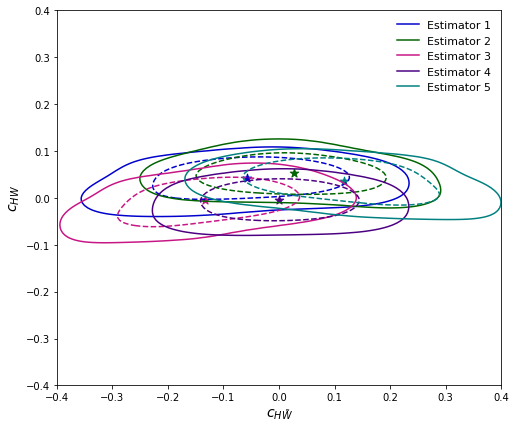

In [32]:
config_sally = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

plot_2D_contours_individual_sally(config_sally)
plt.xlim(-0.4,0.4)
plt.ylim(-0.4,0.4)
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_individual_sally_plots_signal_and_backgrounds.pdf', dpi=600,bbox_inches='tight')


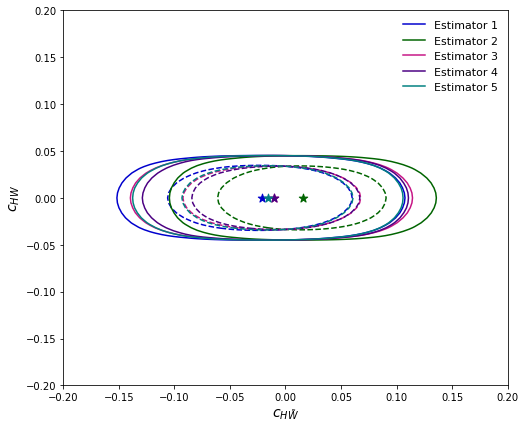

In [33]:
config_sally = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSM_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

plot_2D_contours_individual_sally(config_sally)
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.savefig('/lstore/titan/martafsilva/master_thesis/thesis_plots/2D_individual_sally_plots_signal_only.pdf', dpi=600,bbox_inches='tight')


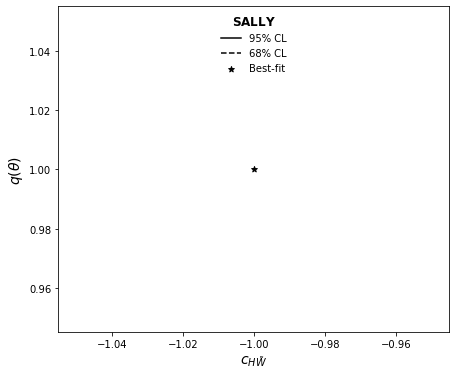

In [ ]:
luminosity_info =  r"$pp \rightarrow W H \rightarrow \ell \nu b \bar{b}$, K+A, SO" + "\n" + r"$\mathcal{L} = 300\, \mathrm{fb}^{-1}$"  
title = r'$\bf{SALLY}$'
plt.figure(figsize=(7, 6))
#text = title + "\n" + luminosity_info
text =  luminosity_info
plt.scatter(-1,1, marker ='*', color = 'black', label = "Best-fit")
plt.plot(-1,1, label = "95% CL", color = 'black')
plt.plot(-1,1, label = "68% CL", color = 'black', ls = '--')
# plt.text(-0.005,0.005, text,
#         fontsize=12,   # Center the text horizontally
#         bbox=dict(facecolor='white', edgecolor='none', alpha=0.5),horizontalalignment='center')
plt.xlabel(r"$c_{H\tildeW}$", size=14)
plt.ylabel(r"$q(\theta)$", size=14)
plt.legend(title = r"$\bfSALLY$",frameon=False, loc="upper center",  title_fontsize=12)

plt.savefig("/lstore/titan/martafsilva/master_thesis/thesis_plots/CLs_text.pdf", dpi=600,bbox_inches='tight')

# Marginalized llr

In [4]:
    def _make_theta_grid(theta_ranges, resolutions):
        if isinstance(resolutions, int):
            resolutions = [resolutions for _ in range(theta_ranges)]
        theta_each = []
        theta_middle = []
        for resolution, (theta_min, theta_max) in zip(resolutions, theta_ranges):
            theta_each.append(np.linspace(theta_min, theta_max, resolution))
            theta_middle.append(0.5 * (theta_max + theta_min))
        theta_grid_each = np.meshgrid(*theta_each, indexing="ij")
        theta_grid_each = [theta.flatten() for theta in theta_grid_each]
        theta_grid = np.vstack(theta_grid_each).T
        theta_middle = np.asarray(theta_middle)
        return theta_grid, theta_middle


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def find_confidence_limits(x_interp, rescaled_log_r_interp, threshold):
    # Find the x-values where the interpolated LLR crosses the confidence level threshold
    crossings = np.where(np.diff(np.sign(rescaled_log_r_interp - threshold)))[0]
    if len(crossings) >= 2:  # Need at least two crossings (one on either side of the best-fit point)
        lower_limit = x_interp[crossings[0]]
        upper_limit = x_interp[crossings[1]]

        # Find the minimum (best-fit point) of the interpolated LLR
        min_index = np.argmin(rescaled_log_r_interp)
        central_value = x_interp[min_index]

        # Print the confidence limits and central value in the desired format
        print(f"Confidence limits at threshold {threshold}: [{lower_limit:.3f}, {upper_limit:.3f}]")
       

def marginalized_likelihood_chwtilde(config):
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"

    num_estimators = 5  # Set the number of estimators
    plt.figure(figsize=(7, 6))  # Create figure for plotting all estimators

    llr_interpolated_list = []  # List to hold the interpolated LLRs for each estimator
    llr_non_interpolated_list = []  # List to hold the non-interpolated LLRs for each estimator
    theta_0_interp = None  # Will be initialized after the first iteration

    for i in range(num_estimators):
        estimator_number = i + 1
        dir = load_dir + f"/estimator_{i}_data_2D.npz"

        # Load the data for the current estimator
        data = np.load(dir)

        parameter_grid = data['parameter_grid']
        llr_kin = data['llr_kin']
        llr_rate = data['llr_rate']
        index_best_point = data['index_best_point']

        # Calculate the rescaled log-likelihood ratio
        rescaled_log_r = llr_kin + llr_rate
        rescaled_log_r = -2.0 * (rescaled_log_r[:] - rescaled_log_r[index_best_point])

        # Extract theta_0 (the first parameter) where theta_1 = 0
        thetas_0 = np.where(parameter_grid[:, 1] == 0)[0]
        theta_0 = parameter_grid[:, 0][thetas_0]
        llr_0 = rescaled_log_r[thetas_0]

        # Perform quadratic spline interpolation for the non-shifted LLRs
        num_points = 303 # Define the resolution for interpolation
        if theta_0_interp is None:
            theta_0_interp = np.linspace(np.min(theta_0), np.max(theta_0), num_points)
        
        spline = UnivariateSpline(theta_0, llr_0, k=2, s=0)  # Use non-shifted LLRs for interpolation
        llr_0_interp = spline(theta_0_interp)

        # Append the interpolated LLR to the list
        llr_interpolated_list.append(llr_0_interp)

        # Store the non-interpolated LLR for std calculation
        llr_non_interpolated_list.append(llr_0)

    # Convert the lists to NumPy arrays for easier calculations
    llr_interpolated_array = np.array(llr_interpolated_list)

    # Calculate the mean of the interpolated LLRs
    llr_mean = np.mean(llr_interpolated_array, axis=0)


    # Shift the mean LLR so that the minimum is at 0
    llr_mean_shifted = llr_mean - np.min(llr_mean)

    # Calculate the standard deviation of the non-interpolated LLRs
    llr_non_interpolated_array = np.array(llr_non_interpolated_list)
    llr_std_non_interpolated = np.std(llr_non_interpolated_array, axis=0)

    # Interpolate the standard deviation
    spline_std = UnivariateSpline(theta_0, llr_std_non_interpolated, k=2, s=0)
    llr_std_interp = spline_std(theta_0_interp)

    # Shift the standard deviation similarly
    llr_std_shifted = llr_std_interp

    # Plot the mean interpolated LLR
    plt.plot(theta_0_interp, llr_mean_shifted, color='mediumblue', linewidth=2, label=r'ALICES ($\alpha = 5$)')

    # Fill the error bands (mean ± std)
    plt.fill_between(theta_0_interp, llr_mean_shifted - llr_std_shifted, llr_mean_shifted + llr_std_shifted, color='mediumblue', alpha=0.1)
    cv_index = np.argmin(llr_mean_shifted)
    central_value = theta_0_interp[cv_index]
    sd_cv = llr_std_shifted[cv_index]  
    
    print(f"Central value (minimum of the LLR): {central_value:.3f}")
    print(f"Standard deviation of the central value: {sd_cv:.3f}")
    # Set labels and legends
    plt.xlabel(r'$c_{H\tilde{W}}$', size = 14)
    plt.ylabel(r'$q(\theta)$', size = 14)
    plt.legend(frameon=False, fontsize=11)
    # Find and print the confidence limits for specified thresholds
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=1.0)
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=3.84)  # Updated threshold




In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def find_confidence_limits(x_interp, rescaled_log_r_interp, threshold):
    # Find the x-values where the interpolated LLR crosses the confidence level threshold
    crossings = np.where(np.diff(np.sign(rescaled_log_r_interp - threshold)))[0]
    if len(crossings) >= 2:  # Need at least two crossings (one on either side of the best-fit point)
        lower_limit = x_interp[crossings[0]]
        upper_limit = x_interp[crossings[1]]

        # Find the minimum (best-fit point) of the interpolated LLR
        min_index = np.argmin(rescaled_log_r_interp)
        central_value = x_interp[min_index]

        # Print the confidence limits and central value in the desired format
        print(f"Confidence limits at threshold {threshold}: [{lower_limit:.3f}, {upper_limit:.3f}]")
       

def marginalized_likelihood_chwtilde_sally(config):
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"

    num_estimators = 5  # Set the number of estimators
    plt.figure(figsize=(7, 6))  # Create figure for plotting all estimators

    llr_interpolated_list = []  # List to hold the interpolated LLRs for each estimator
    llr_non_interpolated_list = []  # List to hold the non-interpolated LLRs for each estimator
    theta_0_interp = None  # Will be initialized after the first iteration

    for i in range(num_estimators):
        estimator_number = i + 1
        dir = load_dir + f"/estimator_{i}_data_2D_test_split_0.5.npz"

        # Load the data for the current estimator
        data = np.load(dir)

        parameter_grid = data['parameter_grid']
        llr_kin = data['llr_kin']
        llr_rate = data['llr_rate']
        index_best_point = data['index_best_point']

        # Calculate the rescaled log-likelihood ratio
        rescaled_log_r = llr_kin + llr_rate
        rescaled_log_r = -2.0 * (rescaled_log_r[:] - rescaled_log_r[index_best_point])

        # Extract theta_0 (the first parameter) where theta_1 = 0
        thetas_0 = np.where(parameter_grid[:, 1] == 0)[0]
        theta_0 = parameter_grid[:, 0][thetas_0]
        llr_0 = rescaled_log_r[thetas_0]

        # Perform quadratic spline interpolation for the non-shifted LLRs
        num_points = 303 # Define the resolution for interpolation
        if theta_0_interp is None:
            theta_0_interp = np.linspace(np.min(theta_0), np.max(theta_0), num_points)
        
        spline = UnivariateSpline(theta_0, llr_0, k=2, s=0)  # Use non-shifted LLRs for interpolation
        llr_0_interp = spline(theta_0_interp)

        # Append the interpolated LLR to the list
        llr_interpolated_list.append(llr_0_interp)

        # Store the non-interpolated LLR for std calculation
        llr_non_interpolated_list.append(llr_0)

    # Convert the lists to NumPy arrays for easier calculations
    llr_interpolated_array = np.array(llr_interpolated_list)

    # Calculate the mean of the interpolated LLRs
    llr_mean = np.mean(llr_interpolated_array, axis=0)


    # Shift the mean LLR so that the minimum is at 0
    llr_mean_shifted = llr_mean - np.min(llr_mean)

    # Calculate the standard deviation of the non-interpolated LLRs
    llr_non_interpolated_array = np.array(llr_non_interpolated_list)
    llr_std_non_interpolated = np.std(llr_non_interpolated_array, axis=0)

    # Interpolate the standard deviation
    spline_std = UnivariateSpline(theta_0, llr_std_non_interpolated, k=2, s=0)
    llr_std_interp = spline_std(theta_0_interp)

    # Shift the standard deviation similarly
    llr_std_shifted = llr_std_interp

    # Plot the mean interpolated LLR
    plt.plot(theta_0_interp, llr_mean_shifted, color='mediumvioletred', linewidth=2, label=r'SALLY')

    # Fill the error bands (mean ± std)
    plt.fill_between(theta_0_interp, llr_mean_shifted - llr_std_shifted, llr_mean_shifted + llr_std_shifted, color='mediumvioletred', alpha=0.1)
    cv_index = np.argmin(llr_mean_shifted)
    central_value = theta_0_interp[cv_index]
    sd_cv = llr_std_shifted[cv_index]  
    
    print(f"Central value (minimum of the LLR): {central_value:.3f}")
    print(f"Standard deviation of the central value: {sd_cv:.3f}")
    # Set labels and legends
    plt.xlabel(r'$c_{H\tilde{W}}$', size = 14)
    plt.ylabel(r'$q(\theta)$', size = 14)
    plt.legend(frameon=False, fontsize=11)
    # Find and print the confidence limits for specified thresholds
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=1.0)
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=3.84)  # Updated threshold


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def find_confidence_limits(x_interp, rescaled_log_r_interp, threshold):
    # Find the x-values where the interpolated LLR crosses the confidence level threshold
    crossings = np.where(np.diff(np.sign(rescaled_log_r_interp - threshold)))[0]
    if len(crossings) >= 2:  # Need at least two crossings (one on either side of the best-fit point)
        lower_limit = x_interp[crossings[0]]
        upper_limit = x_interp[crossings[1]]

        # Find the minimum (best-fit point) of the interpolated LLR
        min_index = np.argmin(rescaled_log_r_interp)
        central_value = x_interp[min_index]

        # Print the confidence limits and central value in the desired format
        print(f"Confidence limits at threshold {threshold}: [{lower_limit:.3f}, {upper_limit:.3f}]")

def marginalized_likelihood_chwtilde_histo(config,var):
    load_dir = f"{config['main_dir']}/llr_fits_hist/{var}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"


    data = np.load(f"{load_dir}/data_2D_test_split_0.5.npz")
    # Load the data for the specified estimator


    parameter_grid = data['parameter_grid']
    llr_kin = data['llr_kin']
    llr_rate = data['llr_rate']
    index_best_point = data['index_best_point']

    # Calculate the rescaled log-likelihood ratio
    rescaled_log_r = llr_kin + llr_rate
    rescaled_log_r = -2.0 * (rescaled_log_r[:] - rescaled_log_r[index_best_point])

    # Extract theta_0 (the first parameter) where theta_1 = 0
    thetas_0 = np.where(parameter_grid[:, 1] == 0)[0]
    theta_0 = parameter_grid[:, 0][thetas_0]
    llr_0 = rescaled_log_r[thetas_0]

    # Perform quadratic spline interpolation for the non-shifted LLRs
    num_points = 303  # Define the resolution for interpolation
    theta_0_interp = np.linspace(np.min(theta_0), np.max(theta_0), num_points)

    spline = UnivariateSpline(theta_0, llr_0, k=2, s=0)  # Use non-shifted LLRs for interpolation
    llr_0_interp = spline(theta_0_interp)

    # Calculate the mean of the interpolated LLRs (only one estimator, so just take the LLR)
    llr_mean = llr_0_interp  # Since we only have one estimator

    # Shift the mean LLR so that the minimum is at 0
    llr_mean_shifted = llr_mean - np.min(llr_mean)

    # Calculate the standard deviation of the LLR (which is just zero here since there's only one estimator)
    llr_std_shifted = np.zeros_like(llr_mean_shifted)

    # Plot the mean interpolated LLR
    plt.plot(theta_0_interp, llr_mean_shifted, color='indigo', linewidth=2, label=r'$Q_{\ell} \cos \delta^+$')

    # Fill the error bands (mean ± std), which will just be the mean since std is 0
    plt.fill_between(theta_0_interp, llr_mean_shifted - llr_std_shifted, llr_mean_shifted + llr_std_shifted, color='mediumvioletred', alpha=0.1)

    
    cv_index = np.argmin(llr_mean_shifted)
    central_value = theta_0_interp[cv_index]
    sd_cv = llr_std_shifted[cv_index]  

    print(f"Central value (minimum of the LLR): {central_value:.3f}")
    print(f"Standard deviation of the central value: {sd_cv:.3f}")

    # Set labels and legends
    plt.xlabel(r'$c_{H\tilde{W}}$', size=14)
    plt.ylabel(r'$q(\theta)$', size=14)
    plt.legend(frameon=False, fontsize=11)

    # Find and print the confidence limits for specified thresholds
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=1.0)
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=3.84)  # Updated threshold


Central value (minimum of the LLR): 0.011
Standard deviation of the central value: 1.595
Confidence limits at threshold 1.0: [-0.026, 0.042]
Confidence limits at threshold 3.84: [-0.058, 0.074]


(-0.2, 0.2)

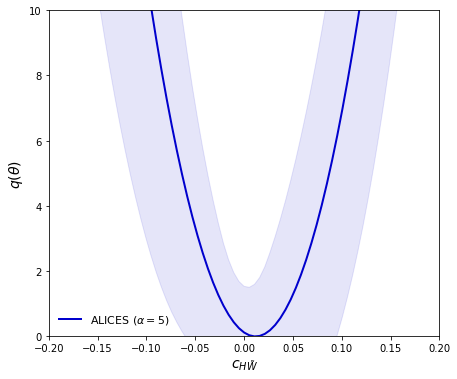

In [8]:
config_alices =  {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        'sample_name': 'wh_signalWithBSM_2D_half',

        'limits': {
            'mode': 'ml',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
            'model': 'alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128',
            'method': 'alices',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chwtilde(config_alices)
plt.ylim(0,10)
plt.xlim(-0.2,0.2)


Central value (minimum of the LLR): -0.011
Standard deviation of the central value: 0.041
Confidence limits at threshold 1.0: [-0.064, 0.037]
Confidence limits at threshold 3.84: [-0.111, 0.090]


(-0.2, 0.2)

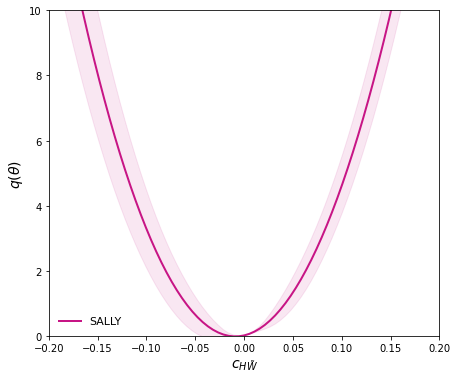

In [11]:
config_sally = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSM_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chwtilde_sally(config_sally)
plt.ylim(0,10)
plt.xlim(-0.2,0.2)

Central value (minimum of the LLR): 0.008
Standard deviation of the central value: 0.000
Confidence limits at threshold 1.0: [-0.079, 0.079]
Confidence limits at threshold 3.84: [-0.159, 0.159]


(0.0, 200.0)

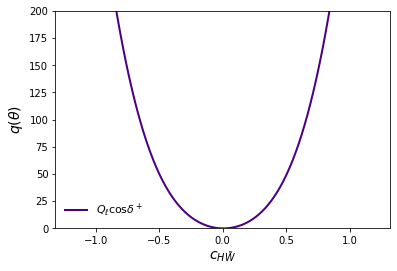

In [58]:
config = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-1.2, 1.2], [-1.0, 1.0]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chwtilde_histo(config,"ql_cos_deltaPlus_pt_w")
plt.ylim(0,200)

Central value (minimum of the LLR): -0.074
Standard deviation of the central value: 9.670
Confidence limits at threshold 1.0: [-0.138, -0.011]
Confidence limits at threshold 3.84: [-0.196, 0.048]


(0.0, 200.0)

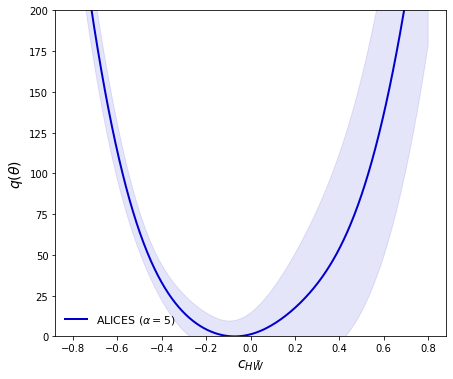

In [9]:
config_alices = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'all_observables_remove_redundant_cos',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_10_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
        'grid_resolutions': [35,35]
    }
}
marginalized_likelihood_chwtilde(config_alices)
plt.ylim(0,200)


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def find_confidence_limits(x_interp, rescaled_log_r_interp, threshold):
    # Find the x-values where the interpolated LLR crosses the confidence level threshold
    crossings = np.where(np.diff(np.sign(rescaled_log_r_interp - threshold)))[0]
    if len(crossings) >= 2:  # Need at least two crossings (one on either side of the best-fit point)
        lower_limit = x_interp[crossings[0]]
        upper_limit = x_interp[crossings[1]]

        # Find the minimum (best-fit point) of the interpolated LLR
        min_index = np.argmin(rescaled_log_r_interp)
        central_value = x_interp[min_index]

        # Print the confidence limits and central value in the desired format
        print(f"Confidence limits at threshold {threshold}: [{lower_limit:.3f}, {upper_limit:.3f}]")
       

def marginalized_likelihood_chw(config):
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"

    num_estimators = 5  # Set the number of estimators
    plt.figure(figsize=(7, 6))  # Create figure for plotting all estimators

    llr_interpolated_list = []  # List to hold the interpolated LLRs for each estimator
    llr_non_interpolated_list = []  # List to hold the non-interpolated LLRs for each estimator
    theta_0_interp = None  # Will be initialized after the first iteration

    for i in range(num_estimators):
        estimator_number = i + 1
        dir = load_dir + f"/estimator_{i}_data_2D.npz"

        # Load the data for the current estimator
        data = np.load(dir)

        parameter_grid = data['parameter_grid']
        llr_kin = data['llr_kin']
        llr_rate = data['llr_rate']
        index_best_point = data['index_best_point']

        # Calculate the rescaled log-likelihood ratio
        rescaled_log_r = llr_kin + llr_rate
        rescaled_log_r = -2.0 * (rescaled_log_r[:] - rescaled_log_r[index_best_point])

        # Extract theta_0 (the first parameter) where theta_1 = 0
        thetas_0 = np.where(parameter_grid[:, 0] == 0)[0]
        theta_0 = parameter_grid[:, 1][thetas_0]
        llr_0 = rescaled_log_r[thetas_0]

        # Perform quadratic spline interpolation for the non-shifted LLRs
        num_points = 303 # Define the resolution for interpolation
        if theta_0_interp is None:
            theta_0_interp = np.linspace(np.min(theta_0), np.max(theta_0), num_points)
        
        spline = UnivariateSpline(theta_0, llr_0, k=2, s=0)  # Use non-shifted LLRs for interpolation
        llr_0_interp = spline(theta_0_interp)

        # Append the interpolated LLR to the list
        llr_interpolated_list.append(llr_0_interp)

        # Store the non-interpolated LLR for std calculation
        llr_non_interpolated_list.append(llr_0)

    # Convert the lists to NumPy arrays for easier calculations
    llr_interpolated_array = np.array(llr_interpolated_list)

    # Calculate the mean of the interpolated LLRs
    llr_mean = np.mean(llr_interpolated_array, axis=0)


    # Shift the mean LLR so that the minimum is at 0
    llr_mean_shifted = llr_mean - np.min(llr_mean)

    # Calculate the standard deviation of the non-interpolated LLRs
    llr_non_interpolated_array = np.array(llr_non_interpolated_list)
    llr_std_non_interpolated = np.std(llr_non_interpolated_array, axis=0)

    # Interpolate the standard deviation
    spline_std = UnivariateSpline(theta_0, llr_std_non_interpolated, k=2, s=0)
    llr_std_interp = spline_std(theta_0_interp)

    # Shift the standard deviation similarly
    llr_std_shifted = llr_std_interp

    # Plot the mean interpolated LLR
    plt.plot(theta_0_interp, llr_mean_shifted, color='mediumblue', linewidth=2, label=r'ALICES ($\alpha = 5$)')

    # Fill the error bands (mean ± std)
    plt.fill_between(theta_0_interp, llr_mean_shifted - llr_std_shifted, llr_mean_shifted + llr_std_shifted, color='mediumblue', alpha=0.1)
    cv_index = np.argmin(llr_mean_shifted)
    central_value = theta_0_interp[cv_index]
    sd_cv = llr_std_shifted[cv_index]  
    
    print(f"Central value (minimum of the LLR): {central_value:.3f}")
    print(f"Standard deviation of the central value: {sd_cv:.3f}")
    # Set labels and legends
    plt.xlabel(r'$c_{H\tilde{W}}$', size = 14)
    plt.ylabel(r'$q(\theta)$', size = 14)
    plt.legend(frameon=False, fontsize=11)
    # Find and print the confidence limits for specified thresholds
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=1.0)
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=3.84)  # Updated threshold



In [48]:
def marginalized_likelihood_chw_sally(config):
    load_dir = f"{config['main_dir']}/llr_fits/{config['limits']['prior']}/{config['limits']['observables']}/{config['limits']['model']}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"

    num_estimators = 5  # Set the number of estimators
    plt.figure(figsize=(7, 6))  # Create figure for plotting all estimators

    llr_interpolated_list = []  # List to hold the interpolated LLRs for each estimator
    llr_non_interpolated_list = []  # List to hold the non-interpolated LLRs for each estimator
    theta_0_interp = None  # Will be initialized after the first iteration

    for i in range(num_estimators):
        estimator_number = i + 1
        dir = load_dir + f"/estimator_{i}_data_2D_test_split_0.5.npz"

        # Load the data for the current estimator
        data = np.load(dir)

        parameter_grid = data['parameter_grid']
        llr_kin = data['llr_kin']
        llr_rate = data['llr_rate']
        index_best_point = data['index_best_point']

        # Calculate the rescaled log-likelihood ratio
        rescaled_log_r = llr_kin + llr_rate
        rescaled_log_r = -2.0 * (rescaled_log_r[:] - rescaled_log_r[index_best_point])

        # Extract theta_0 (the first parameter) where theta_1 = 0
        thetas_0 = np.where(parameter_grid[:, 0] == 0)[0]
        theta_0 = parameter_grid[:, 1][thetas_0]
        llr_0 = rescaled_log_r[thetas_0]

        # Perform quadratic spline interpolation for the non-shifted LLRs
        num_points = 303  # Define the resolution for interpolation
        if theta_0_interp is None:
            theta_0_interp = np.linspace(np.min(theta_0), np.max(theta_0), num_points)
        
        spline = UnivariateSpline(theta_0, llr_0, k=2, s=0)  # Use non-shifted LLRs for interpolation
        llr_0_interp = spline(theta_0_interp)

        # Append the interpolated LLR to the list
        llr_interpolated_list.append(llr_0_interp)

        # Store the non-interpolated LLR for std calculation
        llr_non_interpolated_list.append(llr_0)

    # Convert the lists to NumPy arrays for easier calculations
    llr_interpolated_array = np.array(llr_interpolated_list)

    # Calculate the mean of the interpolated LLRs
    llr_mean = np.mean(llr_interpolated_array, axis=0)


    # Shift the mean LLR so that the minimum is at 0
    llr_mean_shifted = llr_mean - np.min(llr_mean)

    # Calculate the standard deviation of the non-interpolated LLRs
    llr_non_interpolated_array = np.array(llr_non_interpolated_list)
    llr_std_non_interpolated = np.std(llr_non_interpolated_array, axis=0)

    # Interpolate the standard deviation
    spline_std = UnivariateSpline(theta_0, llr_std_non_interpolated, k=2, s=0)
    llr_std_interp = spline_std(theta_0_interp)

    # Shift the standard deviation similarly
    llr_std_shifted = llr_std_interp

    # Plot the mean interpolated LLR
    plt.plot(theta_0_interp, llr_mean_shifted, color='mediumvioletred', linewidth=2, label=r'SALLY')

    # Fill the error bands (mean ± std)
    plt.fill_between(theta_0_interp, llr_mean_shifted - llr_std_shifted, llr_mean_shifted + llr_std_shifted, color='mediumvioletred', alpha=0.1)
    cv_index = np.argmin(llr_mean_shifted)
    central_value = theta_0_interp[cv_index]
    sd_cv = llr_std_shifted[cv_index]  
    
    print(f"Central value (minimum of the LLR): {central_value:.3f}")
    print(f"Standard deviation of the central value: {sd_cv:.3f}")
    # Set labels and legends
    plt.xlabel(r'$c_{H\tilde{W}}$', size = 14)
    plt.ylabel(r'$q(\theta)$', size = 14)
    plt.legend(frameon=False, fontsize=11)
    # Find and print the confidence limits for specified thresholds
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=1.0)
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=3.84)  # Updated threshold


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def find_confidence_limits(x_interp, rescaled_log_r_interp, threshold):
    # Find the x-values where the interpolated LLR crosses the confidence level threshold
    crossings = np.where(np.diff(np.sign(rescaled_log_r_interp - threshold)))[0]
    if len(crossings) >= 2:  # Need at least two crossings (one on either side of the best-fit point)
        lower_limit = x_interp[crossings[0]]
        upper_limit = x_interp[crossings[1]]

        # Find the minimum (best-fit point) of the interpolated LLR
        min_index = np.argmin(rescaled_log_r_interp)
        central_value = x_interp[min_index]

        # Print the confidence limits and central value in the desired format
        print(f"Confidence limits at threshold {threshold}: [{lower_limit:.3f}, {upper_limit:.3f}]")

def marginalized_likelihood_chw_histo(config,var):
    load_dir = f"{config['main_dir']}/llr_fits_hist/{var}/{config['sample_name']}/range_{config['limits']['grid_ranges']}_resolutions_{config['limits']['grid_resolutions']}_2D"


    data = np.load(f"{load_dir}/data_2D_test_split_0.5.npz")
    # Load the data for the specified estimator


    parameter_grid = data['parameter_grid']
    llr_kin = data['llr_kin']
    llr_rate = data['llr_rate']
    index_best_point = data['index_best_point']

    # Calculate the rescaled log-likelihood ratio
    rescaled_log_r = llr_kin + llr_rate
    rescaled_log_r = -2.0 * (rescaled_log_r[:] - rescaled_log_r[index_best_point])

    # Extract theta_0 (the first parameter) where theta_1 = 0
    thetas_0 = np.where(parameter_grid[:, 0] == 0)[0]
    theta_0 = parameter_grid[:, 1][thetas_0]
    llr_0 = rescaled_log_r[thetas_0]

    # Perform quadratic spline interpolation for the non-shifted LLRs
    num_points = 303  # Define the resolution for interpolation
    theta_0_interp = np.linspace(np.min(theta_0), np.max(theta_0), num_points)

    spline = UnivariateSpline(theta_0, llr_0, k=2, s=0)  # Use non-shifted LLRs for interpolation
    llr_0_interp = spline(theta_0_interp)

    # Calculate the mean of the interpolated LLRs (only one estimator, so just take the LLR)
    llr_mean = llr_0_interp  # Since we only have one estimator

    # Shift the mean LLR so that the minimum is at 0
    llr_mean_shifted = llr_mean - np.min(llr_mean)

    # Calculate the standard deviation of the LLR (which is just zero here since there's only one estimator)
    llr_std_shifted = np.zeros_like(llr_mean_shifted)

    # Plot the mean interpolated LLR
    plt.plot(theta_0_interp, llr_mean_shifted, color='indigo', linewidth=2, label=r'$Q_{\ell} \cos \delta^+$')

    # Fill the error bands (mean ± std), which will just be the mean since std is 0
    plt.fill_between(theta_0_interp, llr_mean_shifted - llr_std_shifted, llr_mean_shifted + llr_std_shifted, color='mediumvioletred', alpha=0.1)

    
    cv_index = np.argmin(llr_mean_shifted)
    central_value = theta_0_interp[cv_index]
    sd_cv = llr_std_shifted[cv_index]  

    print(f"Central value (minimum of the LLR): {central_value:.3f}")
    print(f"Standard deviation of the central value: {sd_cv:.3f}")

    # Set labels and legends
    plt.xlabel(r'$c_{H\tilde{W}}$', size=14)
    plt.ylabel(r'$q(\theta)$', size=14)
    plt.legend(frameon=False, fontsize=11)

    # Find and print the confidence limits for specified thresholds
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=1.0)
    find_confidence_limits(theta_0_interp, llr_mean_shifted, threshold=3.84)  # Updated threshold


Central value (minimum of the LLR): 0.000
Standard deviation of the central value: 0.000
Confidence limits at threshold 1.0: [-0.040, 0.033]
Confidence limits at threshold 3.84: [-0.073, 0.066]


(0.0, 200.0)

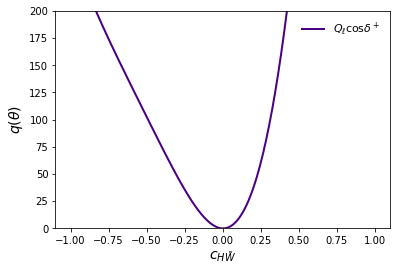

In [60]:
config = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-1.2, 1.2], [-1.0, 1.0]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chw_histo(config,"ql_cos_deltaPlus_pt_w")
plt.ylim(0,200)

In [46]:
config_alices =  {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        'sample_name': 'wh_signalWithBSM_2D_half',

        'limits': {
            'mode': 'ml',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
            'model': 'alices_hidden_[50]_relu_alpha_5_epochs_100_bs_128',
            'method': 'alices',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chw(config_alices)
plt.ylim(0,200)
plt.ylim(0,5)
plt.xlim(-0.2,0.2)

NameError: name 'marginalized_likelihood_chw' is not defined

Central value (minimum of the LLR): -0.026
Standard deviation of the central value: 9.562
Confidence limits at threshold 1.0: [-0.058, 0.000]
Confidence limits at threshold 3.84: [-0.090, 0.026]


(-0.2, 0.2)

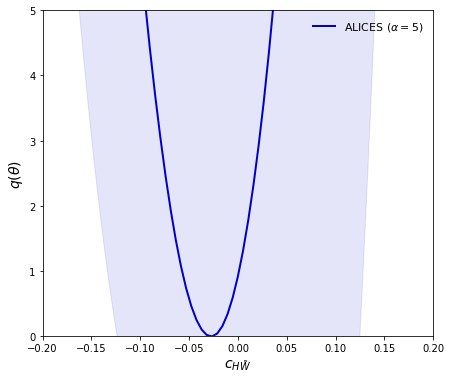

In [11]:
config_alices = {
    'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
    'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
    'plot_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes/plots',
    'limits': {
        'mode': 'ml',
        'observables': 'all_observables_remove_redundant_cos',
        'prior': 'alices_gaussian_prior_0_0.4_0_0.3_10000_thetas_half_samples_2D',
        'model': 'alices_hidden_[100, 100]_tanh_alpha_10_epochs_50_bs_128',
        'method': 'alices',
        'lumi': 300,
        'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
        'grid_resolutions': [35,35]
    }
}
marginalized_likelihood_chw(config_alices)
plt.ylim(0,5)
plt.xlim(-0.2,0.2)


Central value (minimum of the LLR): 0.000
Standard deviation of the central value: 0.001
Confidence limits at threshold 1.0: [-0.016, 0.016]
Confidence limits at threshold 3.84: [-0.032, 0.026]


(-0.1, 0.1)

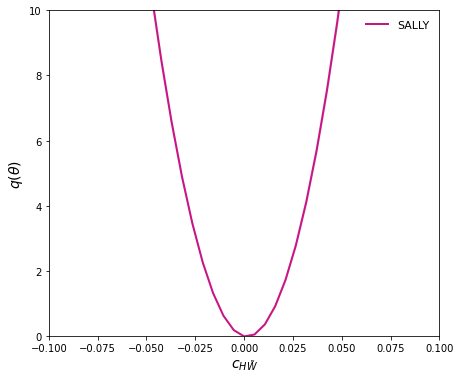

In [18]:
config_sally = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSM_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chw_sally(config_sally)
plt.ylim(0,10)
plt.xlim(-0.1,0.1)

Central value (minimum of the LLR): 0.032
Standard deviation of the central value: 1.070
Confidence limits at threshold 1.0: [0.000, 0.053]
Confidence limits at threshold 3.84: [-0.032, 0.079]


(-0.2, 0.2)

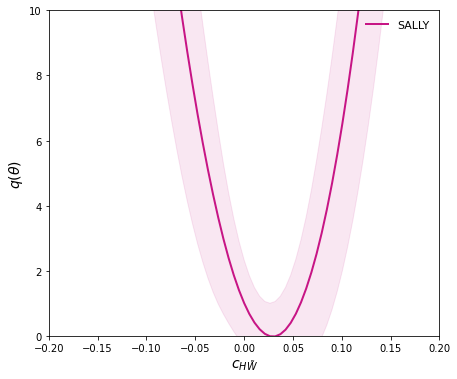

In [19]:
config_sally = {
        'main_dir': '/lstore/titan/martafsilva/master_thesis/master_thesis_output/detector_level_pythia_and_delphes',
        
        'sample_name': 'wh_signalWithBSMAndBackgrounds_2D_half',
        
        'limits': {
            'mode': 'sally',
            'observables': 'all_observables_remove_redundant_cos',
            'prior': 'sally',
            'model': 'sally_hidden_[50]_relu_epochs_50_bs_128',
            'method': 'sally',
            'lumi': 300,
            'grid_ranges': [[-0.8, 0.8], [-0.8, 0.8]],
            'grid_resolutions': [35, 35]
        }
    }

marginalized_likelihood_chw_sally(config_sally)
plt.ylim(0,10)
plt.xlim(-0.2,0.2)